In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 76% 50.0M/66.0M [00:00<00:00, 87.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 112MB/s] 
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [3]:
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.utils import shuffle
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,precision_score,recall_score,matthews_corrcoef,make_scorer,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,NearMiss
from imblearn.combine import SMOTETomek
from matplotlib import gridspec
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
def PCA_ALGO(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    X=shuffle(NEW_X)
    y=X.iloc[:,-1].values

    pca = PCA(n_components=2)
    pca_data=pca.fit_transform(X)
    print(pca_data.shape)
    pca_data=np.vstack((pca_data.T,y)).T
    print(pca_data.shape)
    print(pca_data)
    pca_df=pd.DataFrame(data=pca_data,columns=('PCA1','PCA2','Classe'))
    sns.FacetGrid(pca_df,hue='Classe',size=6).map(plt.scatter,'PCA1','PCA2').add_legend()
    plt.show()

def Distribution(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    #SNS COUNTPLOT
    fig,ax=plt.subplots(figsize=(5,5))
    sns.countplot(data=NEW_X,x="Class")
    plt.show()
def TSNE_algo(X,y):

    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    Fraude=NEW_X[NEW_X['Class']==1]
    Normal=NEW_X[NEW_X['Class']==0]
    Normal=Normal.iloc[0:10000] #pour prendre que 10000 transaction normale
    X=pd.concat([Normal,Fraude])
    X=shuffle(X)
    y=X.iloc[:,-1].values

    #TSNE
    x_test_2d = tsne.fit_transform(X)
    color_map = {0:'green', 1:'red'}
    plt.figure()
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x_test_2d[y==cl,0], 
                    y = x_test_2d[y==cl,1], 
                    c = color_map[idx], 
                    label = cl)
    plt.xlabel('Composant t-SNE 1')
    plt.ylabel('Composant t-SNE 2')
    plt.legend(loc='upper left')
    plt.title('Représentation des données avec T-SNE')
    plt.show()
def roc_auc_plot(y_test,y_pred):

    plt.figure(figsize=(8,6))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print("AUC - ",auc,"\n")

    plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
    plt.legend(loc=4)

    plt.plot([0,1], [0,1], 'k--' )

    plt.rcParams['font.size'] = 12
    plt.title('Courbe ROC')
    plt.xlabel('taux de faux positifs')
    plt.ylabel('taux de vrai positifs')

    plt.show()

In [5]:
def reg_log(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression(C=0.001,penalty='l2')
    logreg.fit(X_tr,y_tr)
    y_pred = logreg.predict(X_ts)
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('matthews_corrcoef : {0:0.5f}'.format(matthews_corrcoef(y_ts , y_pred)))
    print('roc_auc_score_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()
    roc_auc_plot(y_ts,y_pred)

In [6]:
def VotingClassification(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression(C=0.001,penalty='l2')
    rf_classifier = RandomForestClassifier(n_estimators=50)
    KNN=KNeighborsClassifier(n_neighbors =20,algorithm='auto')

    VC=VotingClassifier(estimators=[('lr', logreg), ('rf', rf_classifier), ('knn', KNN)],voting='hard')
    VC.fit(X_tr,y_tr)
    y_pred = VC.predict(X_ts)
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('matthews_corrcoef : {0:0.5f}'.format(matthews_corrcoef(y_ts , y_pred)))
    print('roc_auc_score_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()
    roc_auc_plot(y_ts,y_pred)

In [7]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
Fraude=df[df['Class']==1]
normal=df[df['Class']==0]
print(f'le nombre de transactions normales est :{len(normal)}')
print(f'le nombre de transactions frauduleuses est :{len(Fraude)}')

le nombre de transactions normales est :284315
le nombre de transactions frauduleuses est :492


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


transactions de la X_TRAIN dataset apres SMOTE=Counter({0.0: 227454, 1.0: 227454})
transactions de la dataset X_TEST originale =Counter({0.0: 56861, 1.0: 101})
------------------------------ VotingClassification(KNN,RF,LF) SUR DATASET ORIGINAL ------------------------------
Accuracy :0.99942
Precision : 0.92500
Recall : 0.73267
F1 : 0.81768
matthews_corrcoef : 0.82297
roc_auc_score_score : 0.86628
\\Matrice de confusion ///:- 
 [[56855     6]
 [   27    74]]


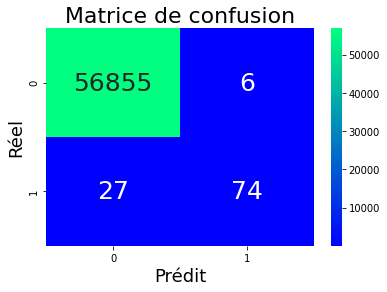

AUC -  0.8662838734234831 



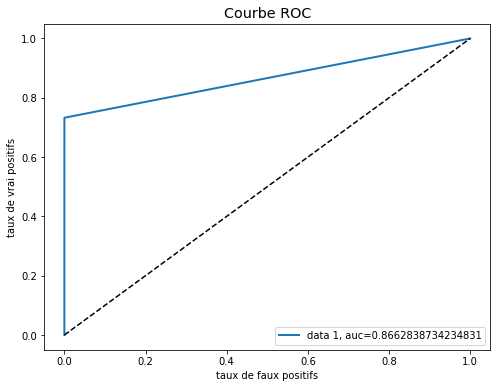

------------------------------ VotingClassification(KNN,RF,LF) AVEC SMOTE ------------------------------
Accuracy :0.99877
Precision : 0.60544
Recall : 0.88119
F1 : 0.71774
matthews_corrcoef : 0.72987
roc_auc_score_score : 0.94008
\\Matrice de confusion ///:- 
 [[56803    58]
 [   12    89]]


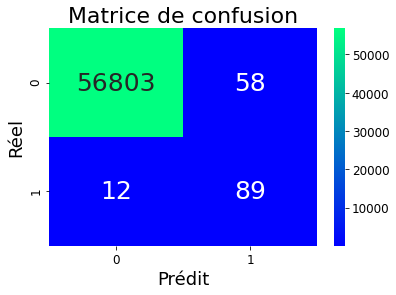

AUC -  0.9400840437537361 



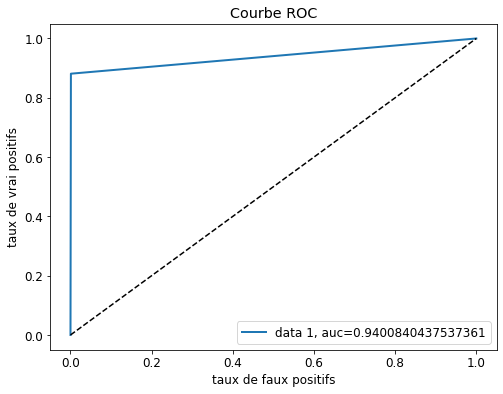

In [9]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)
print("transactions de la X_TRAIN dataset apres SMOTE={}".format(Counter(y_train_smote)))
print("transactions de la dataset X_TEST originale ={}".format(Counter(Y_test)))
#reg_log(X_train_smote,y_train_smote,X_test,Y_test)
print("-"*30,"VotingClassification(KNN,RF,LF) SUR DATASET ORIGINAL",30*"-")
VotingClassification(X_train,Y_train,X_test,Y_test)

print("-"*30,"VotingClassification(KNN,RF,LF) AVEC SMOTE",30*"-")
VotingClassification(X_train_smote,y_train_smote,X_test,Y_test)

